In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 15 and 16

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:6}

**Please be aware that this homework assignment requires installation of several packages in your course environment. It's possible that you'll encounter installation challenges, which might be frustrating. However, remember that solving these issues is not wasting time but it is an essential skill for anyone aspiring to work in data science or machine learning.**

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb. If the pdf or html also fail to render on Gradescope, please create two files for your homework: hw6a.ipynb with Exercise 1 and hw6b.ipynb with Exercises 2 and 3 and submit these two files in your submission.  
</div>

_Points:_ 6

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way. 

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus. 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunxi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sunxi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "Artificial Intelligence", "Deep learning", "Unsupervised learning", "Quantum Computing", 
    "Environmental protection", "Climate Change", "Renewable Energy", "Biodiversity",
    "French Cuisine", "Bread food", "Dumpling food"
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    text = sent_tokenize(wikipedia.page(queries[i]).content)[1]
    wiki_dict["text"].append(text)
    wiki_dict["n_words"].append(len(word_tokenize(text)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17
7,Biodiversity,It can be measured on various levels.,8
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={points}


**Your tasks:**

1. If you are asked to cluster the documents from this toy corpus manually, how many clusters would you identify and how would you label each cluster?   

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

I would identify 3 clusters with the labels of technology, environmental science, and food.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 `KMeans` with bag-of-words representation 
rubric={points}

In the lecture, we saw that data representation plays a crucial role in clustering. Changing flattened representation of images to feature vectors extracted from pre-trained models greatly improved the quality of clustering. 

What kind of representation is suitable for text data? We have used bag-of-words representation to numerically encode text data before, where each document is represented with a vector of word frequencies. 

Let's try clustering documents with this simplistic representation.  

**Your tasks:**

1. Create bag-of-words representation using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with default arguments for the `text` column in `wiki_df` above.
2. Cluster the encoded documents with [`KMeans` clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Use `random_state=42` (for reproducibility) and set `n_clusters` to the number you identified in the previous exercise.
3. Store the clustering labels in `kmeans_bow_labels` variable below. 

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 4

In [5]:
...
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

vec = CountVectorizer()
bow_rep = vec.fit_transform(wiki_df["text"])

kmeans_bow = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans_bow.fit(bow_rep)

KMeans(n_clusters=3, random_state=42)

In [6]:
kmeans_bow_labels = kmeans_bow.labels_

In [7]:
wiki_df["bow_kmeans"] = kmeans_bow_labels
wiki_df

,wiki query,text,n_words,bow_kmeans
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1
7,Biodiversity,It can be measured on various levels.,8,1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Sentence embedding representation
rubric={points}

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text which can be extracted using transfer learning. In this lab, we will use one such representation called sentence embedding representation, which uses deep learning models to generate dense, fixed-length vector representations for sentences. We will extract such representations using sentence transformer package. Sentence embedding takes into account context of words and semantic meaning of sentences and it is likely to work better when we are interested in clustering sentences based on their semantic similarity. 

```
conda activate cpsc330
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus. 
2. Cluster documents in our toy corpus encoded with this representation (`emb_sents`) and `KMeans` with following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the clustering labels in `kmeans_emb_labels` variable below. 

In [8]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

# If this cell gives an error, try updating transformers with
# pip install transformers -U

c:\Users\sunxi\miniconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

c:\Users\sunxi\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sunxi\.cache\huggingface\hub\models--sentence-transformers--paraphrase-distilroberta-base-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.102875,0.201959,0.044091,0.281749,0.321483,-0.281129,0.042515,0.083172,0.155722,-0.114267,...,0.310223,-0.141897,-0.153256,-0.058627,0.005015,-0.005808,0.630392,-0.023694,-0.071900,-0.115921
1,0.000322,0.428834,0.152298,-0.161278,0.224354,-0.363829,0.110951,0.042096,0.188454,0.188299,...,-0.092609,-0.117086,0.133018,0.207266,-0.395182,0.085347,0.677385,-0.405457,0.092258,-0.100411
2,0.236465,-0.282463,-0.258300,0.300584,0.234605,0.061746,-0.072744,0.045550,0.271853,0.054201,...,0.531341,-0.095102,0.316027,0.170600,-0.213746,0.110625,0.463024,-0.658667,0.246860,0.171115
3,0.276844,0.657946,0.106466,0.290566,0.803929,0.023764,0.136675,-0.030063,0.115825,0.244903,...,0.069148,-0.183727,0.217584,0.140797,-0.216237,0.128014,0.181907,-0.054305,0.131837,-0.016249
4,0.200328,0.157551,0.093484,0.120533,-0.439307,0.148569,-0.003543,-0.211189,-0.006088,-0.102894,...,0.187549,-0.430333,-0.350163,0.251643,0.115400,-0.053312,0.088485,0.307340,0.355386,0.024684
5,0.189106,0.406864,0.172560,0.273776,0.058933,0.224642,-0.056590,-0.242728,0.056221,0.127506,...,0.099107,-0.350095,0.070398,0.469786,0.003972,-0.130359,-0.105738,-0.091219,0.210350,0.072002
6,-0.066224,0.465512,-0.135840,-0.229255,-0.144746,0.013772,-0.122810,-0.172322,-0.278583,0.002542,...,-0.090149,-0.305184,-0.048772,-0.008466,0.145859,-0.153741,0.012771,0.507823,0.239722,0.015132
7,-0.139882,0.207129,-0.127446,0.214821,-0.099096,0.063319,-0.347634,-0.203128,0.325749,0.624156,...,0.311010,-0.036291,0.004326,0.078006,0.321024,-0.180906,0.553141,-0.010740,0.382759,0.032368
8,-0.112771,-0.259073,0.172584,-0.149188,-0.074585,0.222288,-0.213039,0.512004,0.216943,-0.200929,...,0.083372,0.196123,0.030323,-0.308583,0.061457,-0.008511,0.350080,0.456677,-0.352978,-0.053868
9,-0.022418,0.217159,0.022694,0.003616,0.240856,0.358046,-0.053310,-0.328075,0.190012,0.244470,...,0.265413,-0.415594,0.003036,0.052484,0.345947,0.110091,0.405441,0.197791,-0.058254,0.212376


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [10]:
...
kmeans_emb = KMeans(n_clusters=3, random_state=42)
kmeans_emb.fit(emb_sents)

KMeans(n_clusters=3, random_state=42)

In [11]:
kmeans_emb_labels = kmeans_emb.labels_

In [12]:
wiki_df["emb_kmeans"] = kmeans_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0
7,Biodiversity,It can be measured on various levels.,8,1,2
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,2
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with cosine distance  
rubric={points}

Now try [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text data, [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work well. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$


**Your tasks**

1. Cluster documents in our toy corpus encoded with sentence embedding representation (`emb_sents`) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) with `metric='cosine'`. You will have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values of these hyperparameters are unlikely to work well on this toy dataset.
2. Store the clustering labels in the `dbscan_emb_labels` variable below. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [13]:
...
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.72062, min_samples=2, metric='cosine')
dbscan.fit(emb_sents)

DBSCAN(eps=0.72062, metric='cosine', min_samples=2)

In [14]:
...
queries

['Artificial Intelligence',
 'Deep learning',
 'Unsupervised learning',
 'Quantum Computing',
 'Environmental protection',
 'Climate Change',
 'Renewable Energy',
 'Biodiversity',
 'French Cuisine',
 'Bread food',
 'Dumpling food']

In [15]:
dbscan_emb_labels = dbscan.labels_

In [16]:
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2,0
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2,0
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2,0
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2,0
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0,0
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0,0
7,Biodiversity,It can be measured on various levels.,8,1,2,-1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,2,-1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={points}

**Your tasks:**

Try hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.
2. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [72.5, 72.5, 100.0, 100.0],
  [42.5, 42.5, 86.25, 86.25],
  [12.5, 12.5, 64.375, 64.375]],
 'dcoord': [[0.0, 0.5573055323017864, 0.5573055323017864, 0.0],
  [0.0, 0.9271151333955724, 0.9271151333955724, 0.5573055323017864],
  [0.0, 0.6121610664917438, 0.6121610664917438, 0.0],
  [0.0, 0.7385820695026367, 0.7385820695026367, 0.6121610664917438],
  [0.0, 0.4836081332682235, 0.4836081332682235, 0.0],
  [0.0, 0.6763329723403044, 0.6763329723403044, 0.4836081332682235],
  [0.0, 0.7279926756266082, 0.7279926756266082, 0.0],
  [0.6763329723403044,
   0.8470648366359942,
   0.8470648366359942,
   0.7279926756266082],
  [0.7385820695026367,
   1.0021016649513308,
   1.0021016649513308,
   0.8470648366359942],
  [0.9271151333955724,
   1.0273084343356687,
   1.0273084343356687,
   1.00210166

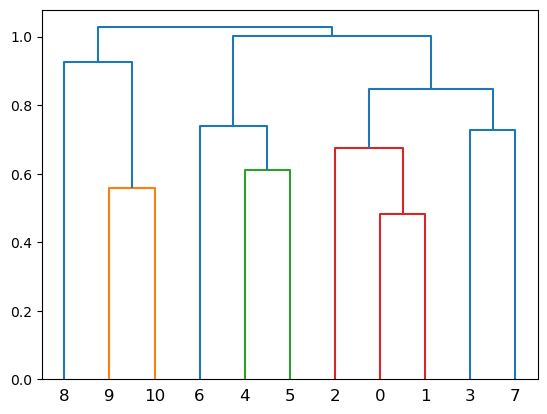

In [17]:
...
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(emb_sents, method='complete', metric='cosine')

dendrogram(linkage_array)

In [18]:
from scipy.cluster.hierarchy import fcluster

hier_emb_labels = fcluster(linkage_array, 3, criterion='maxclust')

In [19]:
# hier_emb_labels = fcluster(Z, 3, criterion="maxclust") # alternative solution

In [20]:
wiki_df["emb_hierarchical"] = hier_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2,0,3
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2,0,3
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2,0,3
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2,0,3
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0,0,2
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0,0,2
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0,0,2
7,Biodiversity,It can be measured on various levels.,8,1,2,-1,3
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,2,-1,1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={points}

**Your tasks:**

1. Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
    - effect of input representation on clustering results
    - whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

- The BOW representation disregards the order and combination of words and only see the frequency of the words, usually leading to poorer clustering results with this semantically meaningless text data. For sentence embedding representation, it keeps the context and semantic meanings, which usually gives us a better clustring results.
- For BOW kmeans model and embedding DBSCAN model, the results do not match my inituitions, while the results of embedding kmeans and embedding hierarchical models are quite good for me. The challenge for the kmeans model is we may fail to identify the best number of clusters and may start with a bad initialization, as well as a complex data distribution shape. For DBSCAN, it is really a challenge to indentify the optimal choice for its hyperparameters eps and min_samples, and bad value choices would lead to really poor clustering results, especially for text data. Hierarchical clustering needs us to pick appropriate linkage method and distance metric.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation     

In [21]:
import umap

In [22]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
):
    """
    Carry out dimensionality reduction using UMAP and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    n_neighbors : int
        n_neighbors hyperparameter of UMAP. See the documentation.
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    Z = reducer.fit_transform(data)  # reduce dimensionality
    umap_df = pd.DataFrame(data=Z, columns=["dim1", "dim2"])
    umap_df["cluster"] = cluster_labels

    if ignore_noise:
        umap_df = umap_df[umap_df["cluster"] != -1]

    labels = np.unique(umap_df["cluster"])

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        umap_df["dim1"],
        umap_df["dim2"],
        c=umap_df["cluster"],
        cmap="tab20b",
        s=size,
        #edgecolors="k",
        #linewidths=0.1,
    )

    legend = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend)

    if show_labels:
        x = umap_df["dim1"].tolist()
        y = umap_df["dim2"].tolist()
        for i, txt in enumerate(raw_sents):
            ax.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
    plt.show()

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

c:\Users\sunxi\miniconda3\Lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


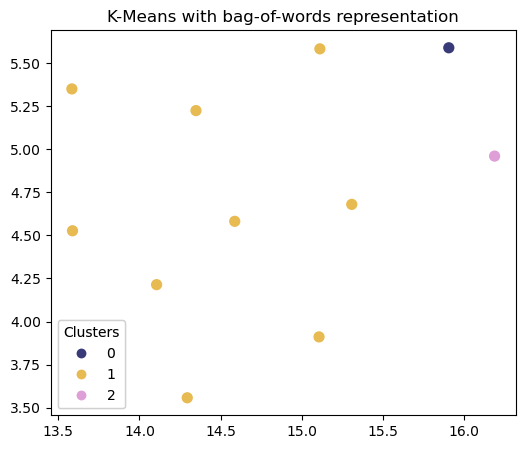

c:\Users\sunxi\miniconda3\Lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


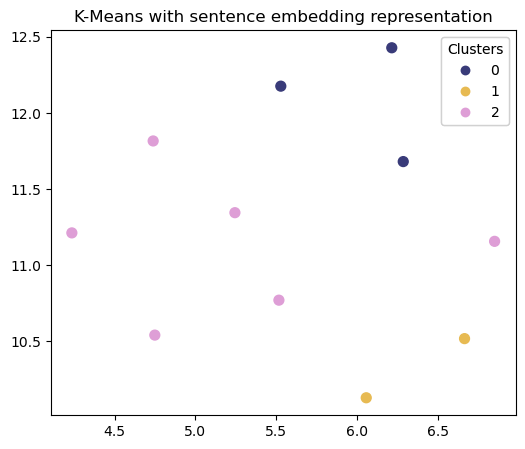

c:\Users\sunxi\miniconda3\Lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


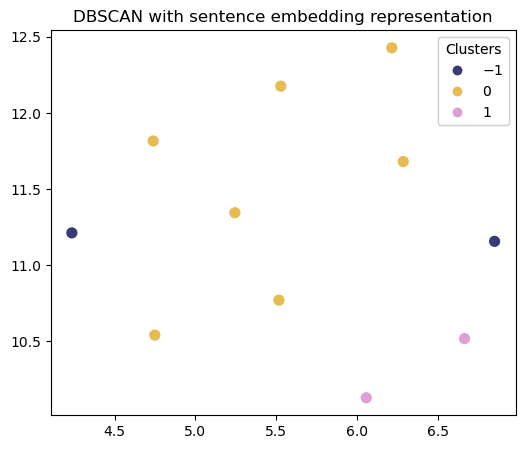

c:\Users\sunxi\miniconda3\Lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


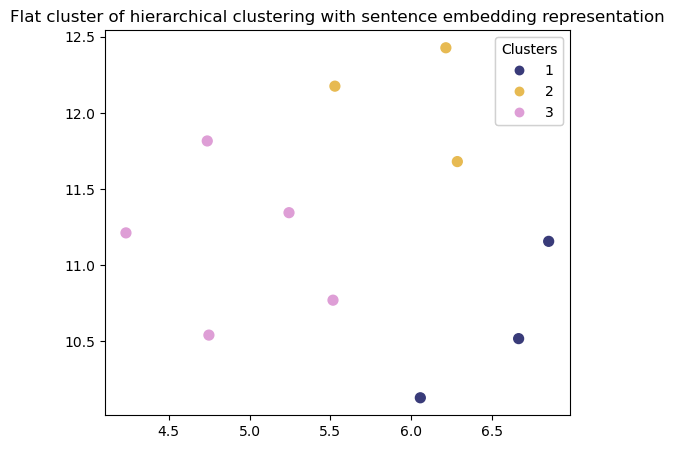

In [23]:
...
plot_umap_clusters(
    data=bow_rep,
    cluster_labels=kmeans_bow_labels,
    title="K-Means with bag-of-words representation"
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=kmeans_emb_labels,
    title="K-Means with sentence embedding representation"
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=dbscan_emb_labels,
    title="DBSCAN with sentence embedding representation"
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=hier_emb_labels,
    title="Flat cluster of hierarchical clustering with sentence embedding representation"
)

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this lab, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

In [24]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [25]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [26]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [27]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.** 

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Longest and shorter recipe names 
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [28]:
shortest_recipe = recipes_df.loc[recipes_df['name'].str.len().idxmin(), 'name']
longest_recipe = recipes_df.loc[recipes_df['name'].str.len().idxmax(), 'name']

...
print(shortest_recipe)
print(longest_recipe)

bread
baked tomatoes with a parmesan cheese crust and balsamic drizzle


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

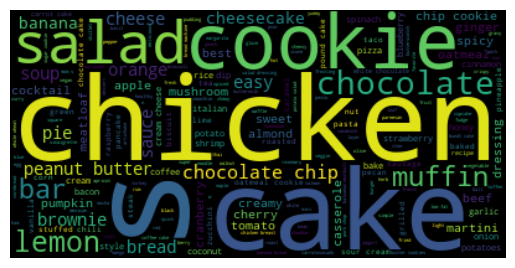

In [29]:
...
from wordcloud import WordCloud

# text = recipes_df['name'].astype(str)
text = ' '.join(recipes_df['name'].astype(str))
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**


<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [30]:
# recipe_names = recipes_df["name"].tolist()

embedder1 = SentenceTransformer("paraphrase-distilroberta-base-v1")
emb_sents1 = embedder1.encode(recipes_df["name"].tolist())


embeddings = pd.DataFrame(emb_sents1, index=recipes_df.index)

...
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
42,-0.333474,0.227865,-0.307339,0.410549,0.917103,-0.345506,0.305810,0.256676,-0.147712,0.040727,...,-0.053025,-0.209463,0.362418,-0.246085,0.208379,-0.024874,0.506561,0.197738,-0.386421,-0.002184
101,-0.024523,0.246223,-0.055708,0.358273,0.454786,-0.088054,0.260368,0.231947,0.093013,-0.007835,...,0.144860,-0.435459,0.208343,-0.002655,-0.081200,-0.130489,0.452378,0.186310,-0.278500,0.028580
129,-0.026562,0.194671,0.038102,-0.099181,0.653784,-0.230868,0.064517,0.001376,-0.061280,0.232094,...,0.169605,0.239354,0.392649,0.271398,-0.093971,0.060101,-0.281418,0.133211,-0.122345,-0.109863
138,-0.168002,-0.219218,0.330761,0.302196,-0.173169,0.204557,0.192390,0.140975,0.303174,0.038063,...,0.019094,-0.002447,0.437833,0.563785,0.033442,0.187657,0.529252,-0.233786,0.509931,0.410715
163,0.061076,-0.333798,0.242906,0.395977,-0.466468,0.496505,-0.136754,0.122097,0.114248,0.065317,...,0.044438,-0.213657,0.410353,-0.233599,-0.224422,0.094330,0.173351,0.105781,-0.114749,-0.150677


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [31]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, random_state=random_state)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice. 

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

To tune the k of my kmeans model, I use the elbow, silhouette plot, umap cluster plot, and manual inspect here. However, both of elbow and silhouette do not show a obviously better value of k even after I tried several different values from 1 up to almost 100 manually, so here I more rely on umap plot and manual inspect. From the umap plot, I think there should be 6 clusters due to the ways of concentration of these point on the plot, and I check the grouping result manually, it looks good in each cluster: the observations look similar to the others in the cluster than to the ones in another cluster. Therefore, I will pick k=6 in my kmeans model.

c:\Users\sunxi\miniconda3\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\sunxi\miniconda3\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


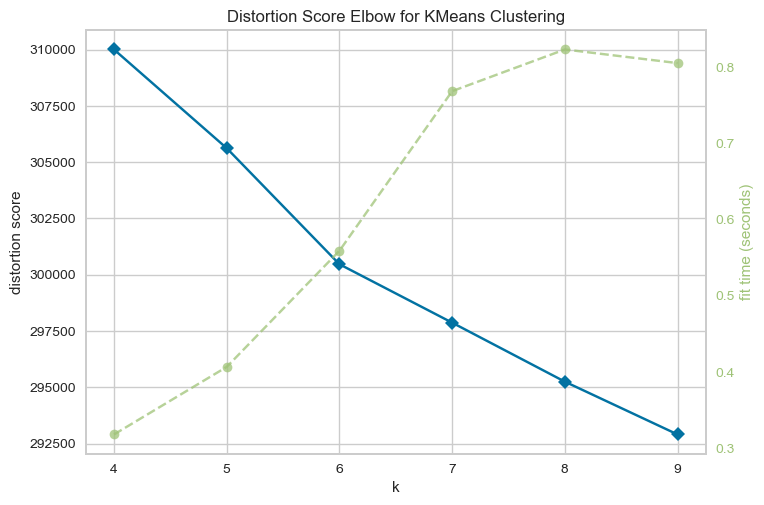

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
...
# elbow plot
from yellowbrick.cluster import KElbowVisualizer

X = embeddings.values

kmeans1 = KMeans(n_init='auto', random_state=123)
visualizer = KElbowVisualizer(kmeans1, k=(4,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

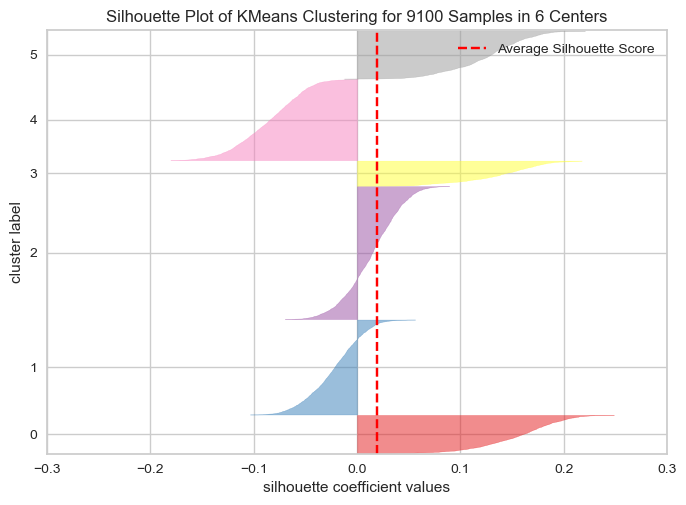

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9100 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

n_clusters = 6 # from the Elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(X)

silhouette_visualizer_kmeans = SilhouetteVisualizer(kmeans)
silhouette_visualizer_kmeans.fit(X)
silhouette_visualizer_kmeans.show()

In [34]:
# model: kmeans
n_clusters = 6  
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
cluster_labels_kmeans = kmeans.fit_predict(X)

# Add cluster labels
recipes_df['cluster'] = cluster_labels_kmeans

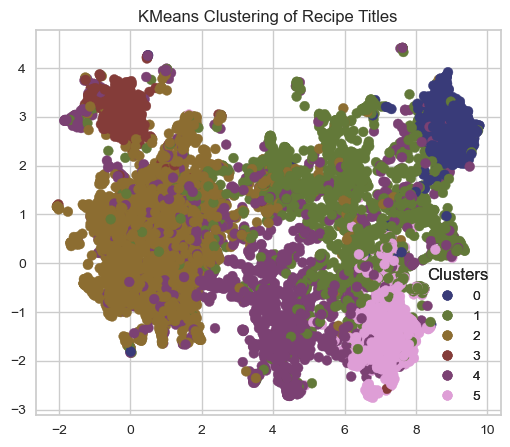

In [35]:
...
# Visualize the clusters
plot_umap_clusters(data=X, cluster_labels=cluster_labels_kmeans, title="KMeans Clustering of Recipe Titles")

In [36]:
# manual inspect:
print_clusters(recipes_df, cluster_labels_kmeans, n_recipes=5, replace=False, random_state=123)

Cluster 0
----------
chocolate marshmallow meltaway cookies
cheesecake cookie bars
nanny s ranger cookies
chocolate and orange marmalade cookies
the very easiest cookies recipe   cake mix cookies



Cluster 1
----------
rogene s pudding dessert
the confederate widow s shortbread
blueberry mango smoothie
choc peppermint slice
healthier banana bread



Cluster 2
----------
ratatouille pasta toss
chicken with cranberry hoisin sauce
dutch pork chops
wicked chicken  hidden valley ranch pizza  rsc
north croatian liver dumplings for soup



Cluster 3
----------
lincoln highway salad dressing
warm goat cheese salad with pear
waldorf salad on the lighter side
spinach salad with maple dressing
japanese ginger salad dressing



Cluster 4
----------
almond joy
hawaiian redneck
limey apricot rum cooler
stone sour
chicken kapama



Cluster 5
----------
charlene s 7 up pound cake
black ginger cake  low fat
chocolate chunk coffee cake
honey spice cake with rum glaze   emeril lagasse
classic pink peppe

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`. 

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

For my DSCAN model, I tried to use the plot_umap_clusters() when I tune the eps and min_samples hyperparameters. Since all of these points are really concentrated and similar in density, it is hard to say which parts are denser: they have to be quite denser than others to be clusters, otherwise they are all considered as noise points, even if some with litte lower density are supposed to form the same clusters as well in pratice. Therefore, even I tried the values from 0.1 to 0.5 for eps (with 4 decimal places) and 0 to 50 for min_samples, the best result is clustering them as four weird groups with quite similar items inside, and the other results are just identified to be tons of noise points and zero or one other cluster.

In [37]:
# model: DBSCAN
dbscan = DBSCAN(eps=0.3202, min_samples=30, metric="cosine")

cluster_labels_dbscan = dbscan.fit_predict(X)

# Add cluster labels
recipes_df['cluster'] = cluster_labels_dbscan

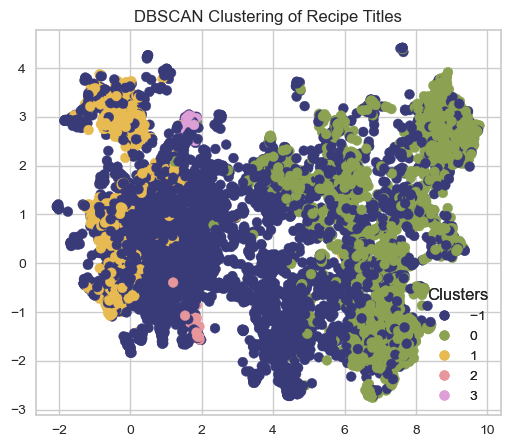

In [38]:
# Visualize the clusters
plot_umap_clusters(data=X, cluster_labels=cluster_labels_dbscan, title="DBSCAN Clustering of Recipe Titles")

In [39]:
# manual inspect:
print_clusters(recipes_df, cluster_labels_dbscan, n_recipes=5, replace=False, random_state=123)

Cluster -1
----------
pacific blue
the governor s cheese grits
kennedy family brownies
ultimate raisin slice
the original guenther house chewy brownies



Cluster 0
----------
overnight coffee cake
oatmeal raisin bran cookies
chocolate bran muffins  dairy  and soy free
sweet cinnamon buns
pink panther cookies



Cluster 1
----------
coco cherry chicken
guilt free caesar salad dressing
sliced mango chicken
scrumptious fresh vinaigrette dressing
bea s broccoli salad



Cluster 2
----------
stuffed meatloaf roll
homestyle meatloaf
turkey meatloaf
tasty turkey meatloaf
italian meatloaf



Cluster 3
----------
best ever potatoes
restuffed potatoes
roasted potatoes with garlic crust
alfredo potatoes
brie mashed potatoes





<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

For hierarchical clustering, I use truncate_mode="level" and p=4 to see the top level levels of the hierarchy and the distances of these clusters. for this model, I tried the number of clusters from 3 to 10, and I find when I increase the number of clusters, the observations in each cluster shown by the function print_clusters() get mixed. I cannot summarize them even as a large category, and some of the similar ones appear in different clusters. Therefore, I decide to set the number of clusters as 3, which makes the observations in each cluster look more like as one similar type.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [180.0, 180.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [260.0, 260.0, 300.0, 300.0],
  [200.0, 200.0, 280.0, 280.0],
  [80.0, 80.0, 240.0, 240.0]],
 'dcoord': [[0.0, 1.0328698409094126,

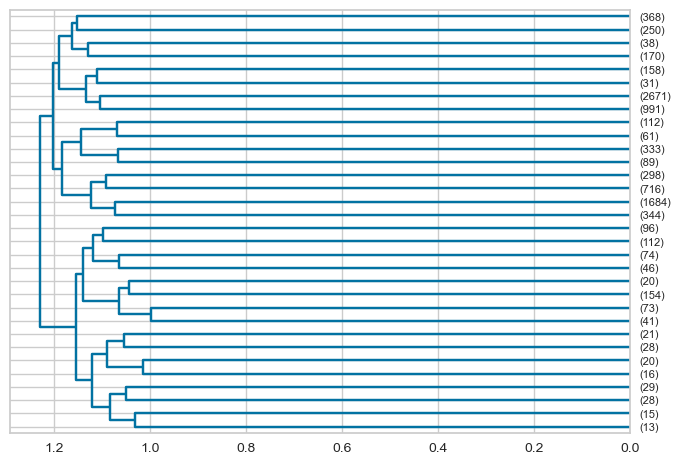

In [40]:
...
# model: hierarchical
linkage_array = linkage(X, method='complete', metric='cosine')

dendrogram(linkage_array, truncate_mode="level", p=4, orientation="left", color_threshold=0.9)

In [41]:
cluster_labels_hier = fcluster(linkage_array, 3, criterion='maxclust')

In [42]:
# manual inspect:
print_clusters(recipes_df, cluster_labels_hier, n_recipes=5, replace=False, random_state=123)

Cluster 1
----------
jamaican crawler cocktail
royal cider grog
coco snowball cocktail
salmon en croute
fresh banana pudding smoothie



Cluster 2
----------
vegetarian demi glace sauce
stuffed flank steak in crock pot
cold tomato   cheese salad
americas best pancakes or waffles from that chicken ranch
parmesan chicken with garlic butter



Cluster 3
----------
sweating colombian
lemon and blueberry yogurt parfait  low fat
the heavy one  cheesecake
cream cheese muffins
oreo chunk cookies





<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

1. - Kmeans: 0: cookies; 1: desserts; 2: main meals; 3: salad and dressing; 4: drinks; 5: cakes.
    - DBSCAN: -1: others; 0: starches; 1: fruits and vagetables; 2: meatloaf; 3: potatoes.
    - Hierarchical clustering: 1: drinks; 2: main meals; 3: desserts.
2. there is a some common theme at a high level with the  grouping of desserts, main meals and drinks; while for the kmeans model, it allows us to divide these types into deeper groups and each cluster is relatively differentiable from another (such as cookies are more like snacks, differing from desserts); DBSCAN gives us many deeper-level groups besides the higher-level ones and misses out some more differentiable categories; hierarchical clustering easily mixes up some deeper-level grouping but is good at the high-level summarizing.

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

![](img/eva-well-done.png)